In [0]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as err
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Read Dataset file
file = pd.read_csv('/root/Keyur Khant/Project/Dataset/Final.csv')

In [0]:
#Make Dataframe of dataset file
df = pd.DataFrame(file)

In [0]:
df = pd.DataFrame(file)
df.head(5)

,State,City,Year,Season,Crop,Area,avgTemp,Cloud Cover,maxTemp,Precipitation,vapPressure,Rainfall,Wet Day Freq,minTemp,Production
0,Gujarat,Ahmedabad,1997,Kharif,Arhar/Tur,2900,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,2200.0
1,Gujarat,Ahmedabad,1997,Kharif,Bajra,41700,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,43700.0
2,Gujarat,Ahmedabad,1997,Kharif,Dry chillies,700,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,700.0
3,Gujarat,Ahmedabad,1997,Kharif,Groundnut,500,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,600.0
4,Gujarat,Ahmedabad,1997,Kharif,Jowar,42500,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,33500.0


In [0]:
#Show how much null value are there in each Column
df.isnull().sum()

State              0
City               0
Year               0
Season             0
Crop               0
Area               0
avgTemp            2
Cloud Cover        7
maxTemp            7
Precipitation      7
vapPressure        7
Rainfall           0
Wet Day Freq       7
minTemp          228
Production        69
dtype: int64

In [0]:
#Fill all Null value with 0
df['Production'].fillna(df['Production'].median(), inplace=True)

In [0]:
#Fill all Null value of Minimum Temprature with median of it
df.fillna(df.mean(), inplace=True)

In [0]:
df.isnull().sum()

State            0
City             0
Year             0
Season           0
Crop             0
Area             0
avgTemp          0
Cloud Cover      0
maxTemp          0
Precipitation    0
vapPressure      0
Rainfall         0
Wet Day Freq     0
minTemp          0
Production       0
dtype: int64

In [0]:
#Convert Production to unit production Ex. Production per 1 Hectre
df['Production'] = df['Production'] / df['Area']

In [0]:
df['Crop'].unique()

array(['Arhar/Tur', 'Bajra', 'Dry chillies', 'Groundnut', 'Jowar',
       'Moong(Green Gram)', 'Moth', 'Other Kharif pulses', 'Urad', 'Gram',
       'Rapeseed &Mustard', 'Wheat', 'Banana', 'Castor seed',
       'Cotton(lint)', 'Maize', 'Potato', 'Pulses total', 'Rice',
       'Sesamum', 'Sugarcane', 'Tobacco', 'Other Cereals & Millets',
       'Small millets', 'Oilseeds total', 'Onion', 'Guar seed',
       'other oilseeds', 'Garlic', 'Other  Rabi pulses', 'Ragi',
       'Soyabean'], dtype=object)

In [0]:
#Remove state Column because it is same for whole dataset
df = df.drop('State',axis =1)

In [0]:
#We take Production as a unit area.So no need of area column
df = df.drop('Area',axis =1)

In [0]:
df.head(10)

,City,Year,Season,Crop,avgTemp,Cloud Cover,maxTemp,Precipitation,vapPressure,Rainfall,Wet Day Freq,minTemp,Production
0,Ahmedabad,1997,Kharif,Arhar/Tur,31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,0.758621
1,Ahmedabad,1997,Kharif,Bajra,31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,1.047962
2,Ahmedabad,1997,Kharif,Dry chillies,31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,1.000000
3,Ahmedabad,1997,Kharif,Groundnut,31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,1.200000
4,Ahmedabad,1997,Kharif,Jowar,31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,0.788235
5,Ahmedabad,1997,Kharif,Moong(Green Gram),31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,0.521739
6,Ahmedabad,1997,Kharif,Moth,31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,1.000000
7,Ahmedabad,1997,Kharif,Other Kharif pulses,31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,0.500000
8,Ahmedabad,1997,Kharif,Urad,31.2394,52.42280,37.931,176.327,35.2654,540.9,12.6895,24.037,0.846154
9,Ahmedabad,1997,Rabi,Gram,23.3960,9.82025,34.858,12.808,3.2020,18.6,2.8152,12.348,0.500000


In [0]:
#Round-off all values by .2
df = df.round(2)
df.head(5)

,City,Year,Season,Crop,avgTemp,Cloud Cover,maxTemp,Precipitation,vapPressure,Rainfall,Wet Day Freq,minTemp,Production
0,Ahmedabad,1997,Kharif,Arhar/Tur,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,0.76
1,Ahmedabad,1997,Kharif,Bajra,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,1.05
2,Ahmedabad,1997,Kharif,Dry chillies,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,1.00
3,Ahmedabad,1997,Kharif,Groundnut,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,1.20
4,Ahmedabad,1997,Kharif,Jowar,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,0.79


In [0]:
#Covert all Rainfall Variable into Float from String
df['Rainfall'] = df['Rainfall'].astype(float)

In [0]:
#Shape of Dataset
df.shape

(8436, 13)

In [0]:
df['Production'].replace(0,0.01,inplace=True)

In [0]:
(df['Production'] == 0).sum()

0

In [0]:
df.describe()

,Year,avgTemp,Cloud Cover,maxTemp,Precipitation,vapPressure,Rainfall,Wet Day Freq,minTemp,Production
count,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000
mean,2005.159673,26.456321,35.305011,35.081976,518.041106,23.634073,444.719363,21.776161,17.270068,5.869533
std,4.586311,3.332672,16.711387,4.146466,430.048550,15.937587,392.677590,16.024391,4.429441,15.071495
min,1997.000000,17.330000,6.980000,25.610000,0.000000,0.070000,5.120000,0.000000,8.010000,0.010000
25%,2001.000000,23.210000,19.620000,32.520000,16.520000,18.150000,120.320000,2.130000,12.800000,0.660000
50%,2005.000000,27.520000,35.350000,35.450000,558.410000,22.930000,410.300000,23.900000,17.980000,1.150000
75%,2009.000000,29.252500,50.960000,38.410000,824.230000,26.262500,673.700000,33.870000,21.430000,2.200000
max,2012.000000,32.020000,64.200000,42.550000,2260.640000,199.470000,1870.260000,65.980000,24.750000,235.000000


In [0]:
df.dtypes

City              object
Year               int64
Season            object
Crop              object
avgTemp          float64
Cloud Cover      float64
maxTemp          float64
Precipitation    float64
vapPressure      float64
Rainfall         float64
Wet Day Freq     float64
minTemp          float64
Production       float64
dtype: object

In [0]:
df.columns

Index(['City', 'Year', 'Season', 'Crop', 'avgTemp', 'Cloud Cover', 'maxTemp',
       'Precipitation', 'vapPressure', 'Rainfall', 'Wet Day Freq', 'minTemp',
       'Production'],
      dtype='object')

In [0]:
df.head()

,City,Year,Season,Crop,avgTemp,Cloud Cover,maxTemp,Precipitation,vapPressure,Rainfall,Wet Day Freq,minTemp,Production
0,Ahmedabad,1997,Kharif,Arhar/Tur,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,0.76
1,Ahmedabad,1997,Kharif,Bajra,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,1.05
2,Ahmedabad,1997,Kharif,Dry chillies,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,1.00
3,Ahmedabad,1997,Kharif,Groundnut,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,1.20
4,Ahmedabad,1997,Kharif,Jowar,31.24,52.42,37.93,176.33,35.27,540.9,12.69,24.04,0.79


In [0]:
X = df.select_dtypes(include=[object])
X.head(10)

,City,Season,Crop
0,Ahmedabad,Kharif,Arhar/Tur
1,Ahmedabad,Kharif,Bajra
2,Ahmedabad,Kharif,Dry chillies
3,Ahmedabad,Kharif,Groundnut
4,Ahmedabad,Kharif,Jowar
5,Ahmedabad,Kharif,Moong(Green Gram)
6,Ahmedabad,Kharif,Moth
7,Ahmedabad,Kharif,Other Kharif pulses
8,Ahmedabad,Kharif,Urad
9,Ahmedabad,Rabi,Gram


In [0]:
# One-hot encode the data using pandas get_dummies
df_coded = pd.get_dummies(df)

In [0]:
df_coded

,Year,avgTemp,Cloud Cover,maxTemp,Precipitation,vapPressure,Rainfall,Wet Day Freq,minTemp,Production,...,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Sesamum,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Tobacco,Crop_Urad,Crop_Wheat,Crop_other oilseeds
0,1997,31.24,52.42,37.93,176.33,35.27,540.90,12.69,24.04,0.76,...,0,0,0,0,0,0,0,0,0,0
1,1997,31.24,52.42,37.93,176.33,35.27,540.90,12.69,24.04,1.05,...,0,0,0,0,0,0,0,0,0,0
2,1997,31.24,52.42,37.93,176.33,35.27,540.90,12.69,24.04,1.00,...,0,0,0,0,0,0,0,0,0,0
3,1997,31.24,52.42,37.93,176.33,35.27,540.90,12.69,24.04,1.20,...,0,0,0,0,0,0,0,0,0,0
4,1997,31.24,52.42,37.93,176.33,35.27,540.90,12.69,24.04,0.79,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8431,2012,21.12,11.71,29.56,0.94,13.78,16.48,0.57,11.58,1.00,...,0,0,0,0,0,0,0,0,0,0
8432,2012,21.12,11.71,29.56,0.94,13.78,16.48,0.57,11.58,0.79,...,0,0,0,0,0,0,0,0,0,0
8433,2012,26.24,23.93,33.14,3.20,19.37,355.32,2.45,17.09,2.83,...,0,1,0,0,0,0,0,0,0,0
8434,2012,23.89,31.07,33.14,586.60,18.90,664.42,38.79,11.58,1.00,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y = df_coded['Production']
X = df_coded.drop('Production',axis = 1) 
y = y.values
X = X.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=42,shuffle = True)

In [0]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (6833, 71)
Training Labels Shape: (6833,)
Testing Features Shape: (1603, 71)
Testing Labels Shape: (1603,)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
scaler.mean_

array([2.00518381e+03, 2.64384429e+01, 3.52928187e+01, 3.50587999e+01,
       5.21416735e+02, 2.34488658e+01, 4.45252100e+02, 2.18564159e+01,
       1.72535958e+01, 4.30264891e-02, 4.08312601e-02, 2.98551149e-02,
       4.59534611e-02, 4.69779014e-02, 4.30264891e-02, 2.64890970e-02,
       2.75135372e-02, 3.92214254e-02, 4.36118835e-02, 4.37582321e-02,
       5.32708913e-02, 3.77579394e-02, 4.90267818e-02, 2.37084736e-02,
       2.59037026e-02, 5.79540465e-02, 2.37084736e-02, 1.94643641e-02,
       3.96604712e-02, 4.77096444e-02, 5.01975706e-02, 3.93677740e-02,
       1.44885116e-02, 5.37099371e-02, 3.38065271e-02, 5.02561101e-01,
       1.93180155e-01, 1.05224645e-01, 1.99034099e-01, 4.08312601e-02,
       7.34669984e-02, 2.00497585e-02, 3.98068198e-02, 3.71725450e-02,
       3.45382702e-02, 2.64890970e-02, 4.25874433e-02, 7.63939704e-02,
       1.94643641e-02, 5.66369091e-02, 3.68798478e-02, 5.09293136e-02,
       2.85379775e-02, 2.48792624e-03, 3.43919216e-02, 1.85862725e-02,
      

In [0]:
scaler.var_

array([2.10064583e+01, 1.10924927e+01, 2.77719294e+02, 1.73446500e+01,
       1.86746463e+05, 2.30840652e+02, 1.53951260e+05, 2.56208554e+02,
       1.96800848e+01, 4.11752103e-02, 3.91640683e-02, 2.89637870e-02,
       4.38417406e-02, 4.47709781e-02, 4.11752103e-02, 2.57874248e-02,
       2.67565425e-02, 3.76831052e-02, 4.17098871e-02, 4.18434492e-02,
       5.04331034e-02, 3.63322774e-02, 4.66231565e-02, 2.31463819e-02,
       2.52327008e-02, 5.45953750e-02, 2.31463819e-02, 1.90855026e-02,
       3.80875183e-02, 4.54334342e-02, 4.76777745e-02, 3.78179524e-02,
       1.42785947e-02, 5.08251797e-02, 3.26636459e-02, 2.49993441e-01,
       1.55861583e-01, 9.41524192e-02, 1.59419527e-01, 3.91640683e-02,
       6.80695985e-02, 1.96477657e-02, 3.82222369e-02, 3.57907469e-02,
       3.33453781e-02, 2.57874248e-02, 4.07737530e-02, 7.05579317e-02,
       1.90855026e-02, 5.34291696e-02, 3.55197246e-02, 4.83355186e-02,
       2.77235613e-02, 2.48173646e-03, 3.32091173e-02, 1.82408230e-02,
      

# k Nearest Neighbour Regressor Algorithm

In [0]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model1 = KNeighborsRegressor(n_neighbors = K)
    model1.fit(X_train, y_train)  #fit the model
    y_pred = model1.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6.3459889483831144
RMSE value for k=  2 is: 5.741895762950499
RMSE value for k=  3 is: 5.400613810938515
RMSE value for k=  4 is: 5.199696274615785
RMSE value for k=  5 is: 5.178279430372056
RMSE value for k=  6 is: 5.154808644280217
RMSE value for k=  7 is: 5.215284679551997
RMSE value for k=  8 is: 5.192301974775268
RMSE value for k=  9 is: 5.157839203076772
RMSE value for k=  10 is: 5.1593844920560405
RMSE value for k=  11 is: 5.171573525419456
RMSE value for k=  12 is: 5.180555811675339
RMSE value for k=  13 is: 5.133889934594933
RMSE value for k=  14 is: 5.173609526762908
RMSE value for k=  15 is: 5.181020146653869
RMSE value for k=  16 is: 5.162610660487605
RMSE value for k=  17 is: 5.174270737018614
RMSE value for k=  18 is: 5.188070688785126
RMSE value for k=  19 is: 5.184642460367581
RMSE value for k=  20 is: 5.20571731155794


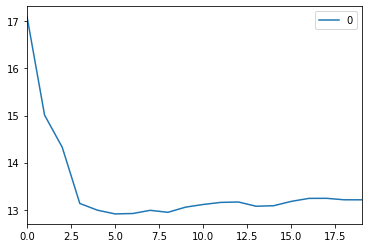

In [0]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [0]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,12]}

knn = KNeighborsRegressor()

model1 = GridSearchCV(knn, params, cv=5)
model1.fit(X_train,y_train)
model1.best_params_

{'n_neighbors': 5}

In [0]:
knn_pred = model1.predict(X_test)

In [0]:
y_test

array([1.78, 0.6 , 2.  , ..., 2.14, 1.5 , 0.48])

In [0]:
knn_pred

array([1.834, 0.482, 1.366, ..., 2.206, 1.51 , 0.5  ])

In [0]:
print("kNN Accuracy: " + str((model1.score(X_test,y_test) * 100).round(2)) + " %")

kNN Accuracy: 87.51 %


In [0]:
error = err(y_test, knn_pred)
print( "MSE: %.4f" % error)

MSE: 26.8146


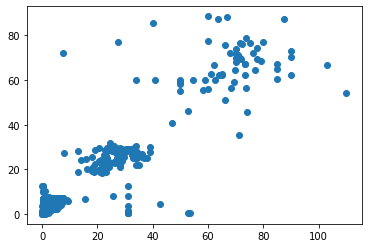

In [0]:
plt.scatter(y_test,knn_pred)
plt.show()

# Gredient Boosting XgBoost Regressor Algorithm

In [0]:
# Parameters
params = {'n_estimators' :600, 'learning_rate' : 0.4, 'loss' : 'ls',
         'max_depth' : 8}
# instantiating the model
model2 = GradientBoostingRegressor(**params)

In [0]:
# fitting the model
model2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.4, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
Xg_pred = model2.predict(X_test)

In [0]:
print("XgBoost Accuracy: " + str((model2.score(X_test,y_test) * 100).round(2)) + " %")

XgBoost Accuracy: 88.61 %


In [0]:
error2 = err(y_test, Xg_pred)
print( "MSE: %.4f" % error2)

MSE: 24.4485


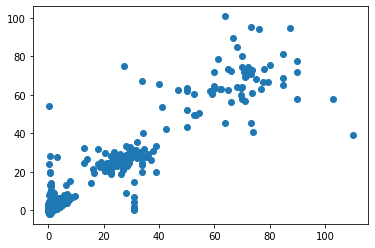

In [0]:
plt.scatter(y_test,Xg_pred)
plt.show()

# Random Forest Regressor Algorithm

In [0]:
model3 = RandomForestRegressor(n_jobs=-1)

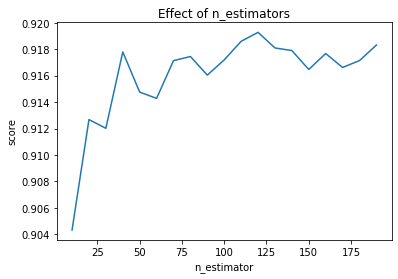

In [0]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model3.set_params(n_estimators=n)
    model3.fit(X_train, y_train)
    scores.append(model3.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [0]:
scores

[0.9043251252977873,
 0.9126807080423107,
 0.9120198470014139,
 0.9177998696737084,
 0.9147575861266243,
 0.9142854213654532,
 0.9171385649124888,
 0.9174516803864466,
 0.9160458844260778,
 0.9171954895928623,
 0.9186016233190427,
 0.9192805398215195,
 0.9181001968389016,
 0.917901651314141,
 0.9164731875315167,
 0.9176765346441269,
 0.9166232868417596,
 0.9171435637896278,
 0.9183191599731586]

In [0]:
model3.set_params(n_estimators=130)
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.9179364742333534

In [0]:
rf_pred = model3.predict(X_test)

In [0]:
print("Random Forest Accuracy: " + str((model3.score(X_test,y_test) * 100).round(2)) + " %")

Random Forest Accuracy: 91.79 %


In [0]:
error3 = err(y_test, rf_pred)
print( "MSE: %.4f" % error3)

MSE: 17.6174


In [0]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model3, '/root/Keyur Khant/Project/Models/FinalRFModel.pkl') 

['/root/Keyur Khant/Project/Models/FinalRFModel.pkl']

In [0]:
# Saving the data columns from training
X_column = df_coded.drop('Production',axis = 1)
model_columns = list(X_column.columns)
joblib.dump(model_columns, '/root/Keyur Khant/Project/Models/FinalModel_columns.pkl')
print("Models columns dumped!")

Models columns dumped!


# XgBoost Regressor

In [0]:
model4 = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [0]:
model4.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

In [0]:
preds = model4.predict(X_test)

In [0]:
print("Random Forest Accuracy: " + str((model4.score(X_test,y_test) * 100).round(2)) + " %")

Random Forest Accuracy: 90.0 %


In [0]:
error4 = err(y_test, preds)
print( "MSE: %.4f" % error4)

MSE: 21.4722


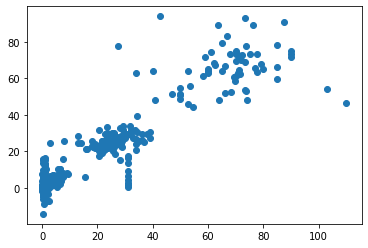

In [0]:
plt.scatter(y_test,preds)
plt.show()